### Pandas를 이용한 시각화
- matplotlib을 이용한 시각화 : 여러 옵션들 설정해서 직접 그려볼 수 잇다. 커스터마이징에 용이
- pandas, seaborn을 이용한 시각화 : 손쉽게 차트를 그려볼 수 있다.

In [8]:
import pandas as pd
import numpy as np

### 1. line chart
연도별 입사자 추세 확인

In [9]:
# hr 데이터
hr_info = pd.read_csv('C:\\Users\\1\\Desktop\\workspace\\core-project-study\\jinseok\\python-study\\data\\hr-info.csv', encoding='euc-kr', parse_dates=['HIRE_DATE'])
# parse_date

hr_info.head()

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
3,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
4,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y


In [9]:
hr_info['HIRE_YEAR'] = hr_info['HIRE_DATE'].dt.year

hr_info

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,...,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION,HIRE_YEAR
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,...,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y,1999
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,...,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y,2000
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,...,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y,2002
3,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,...,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y,2006
4,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,...,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.00,4500,...,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,2024
196,E00389,초두반,F,ORG012,P009,23,0,학사 학위,0.00,4500,...,4,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N,2024
197,E00438,권개득,M,ORG024,P009,23,0,학사 학위,0.00,4500,...,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,2024
198,E00304,탐출조,M,ORG009,P009,24,0,학사 학위,0.00,4500,...,4,Salesforce,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,2024


In [11]:
# 연도별 입사자 수 파악
hr_info['HIRE_YEAR'].value_counts().sort_index()

HIRE_YEAR
1999     1
2000     1
2002     1
2004     4
2005     4
2006     4
2010     7
2011     7
2012     8
2015    12
2016    12
2017    12
2022    25
2023    29
2024    73
Name: count, dtype: int64

<Axes: xlabel='HIRE_YEAR', ylabel='HIRE_COUNT'>

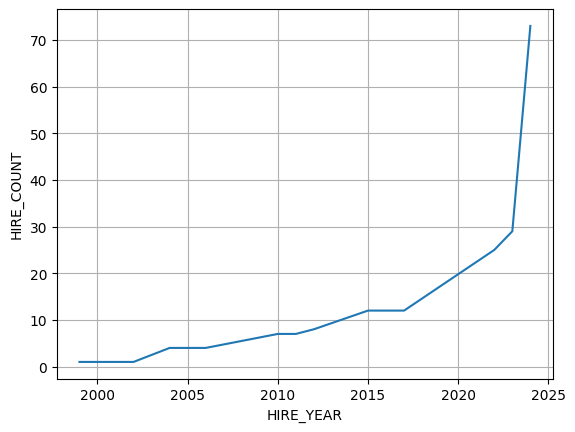

In [18]:
# 연도별로 입사자 수 선 그래프로 파악하기
hr_info['HIRE_YEAR'].value_counts().sort_index().plot(kind='line', # 그래프 종류
                                                        xlabel = 'HIRE_YEAR',
                                                        ylabel = 'HIRE_COUNT',
                                                        grid = True,)

### 2. bar chart

In [12]:
# 한글 폰트 적용
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')

#### 학위별 평균 연봉 비교


In [23]:
# 데이터 집계
hr_info.head(1)

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,...,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION,HIRE_YEAR
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.5,10200,...,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y,1999


In [28]:
hr_info[['EDU_LEVEL', 'SALARY']].groupby('EDU_LEVEL').mean()

,SALARY
EDU_LEVEL,
고등학교 졸업,6140.000000
박사 학위,8166.666667
석사 학위,6900.000000
전문대 학위,5050.000000
학사 학위,5727.044025


<Axes: title={'center': '학위별 평균'}, xlabel='EDU_LEVEL', ylabel='SALARY'>

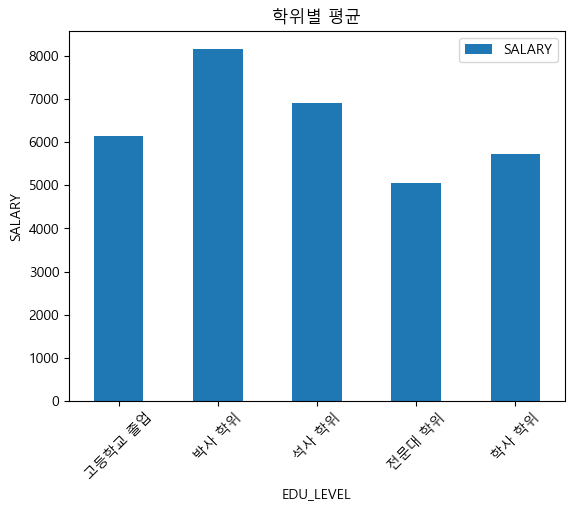

In [33]:
# 데이터 집계 및 시각화
hr_info[['EDU_LEVEL', 'SALARY']].groupby('EDU_LEVEL').mean().plot(kind='bar', xlabel = 'EDU_LEVEL', rot = 45 , ylabel = 'SALARY', title = '학위별 평균')

#### 학위, 성별에 따른 평균연봉 시각화


<Axes: xlabel='EDU_LEVEL & gender', ylabel='salary'>

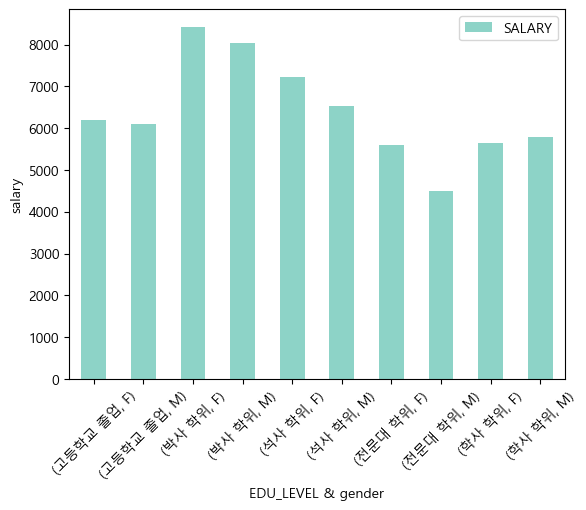

In [37]:
hr_info[['EDU_LEVEL', 'GENDER', 'SALARY']].groupby(['EDU_LEVEL', 'GENDER']).mean().plot(kind='bar', xlabel = 'EDU_LEVEL & gender', ylabel = 'salary', colormap = 'Set3', rot = 45)

In [13]:
salary_mean = hr_info[['EDU_LEVEL', 'GENDER', 'SALARY']].groupby(['EDU_LEVEL', 'GENDER']).mean()

In [14]:
salary_mean2 = salary_mean.reset_index().pivot(index='EDU_LEVEL', columns='GENDER', values='SALARY')
# 인덱스 : 교윣준
# 컬럼: 성별(F, M)
# 들어갈 값 : 연봉

salary_mean2

GENDER,F,M
EDU_LEVEL,,
고등학교 졸업,6200.000000,6100.000000
박사 학위,8425.000000,8037.500000
석사 학위,7233.333333,6525.000000
전문대 학위,5600.000000,4500.000000
학사 학위,5643.076923,5785.106383


<Axes: title={'center': '교육 수준과 성별에 다른 평균 연봉 비교'}, xlabel='평균 연봉', ylabel='교육 수준'>

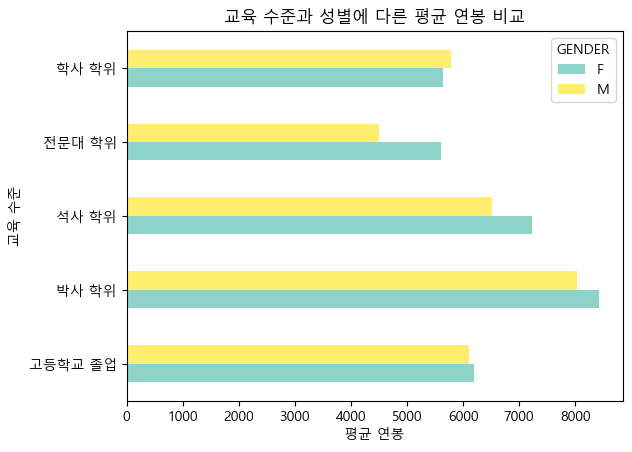

In [42]:
# 시각화
# barh : 막대그래프 ( 수평 )
salary_mean2.plot(kind='barh', colormap='Set3', xlabel = '평균 연봉', ylabel = '교육 수준', title = '교육 수준과 성별에 다른 평균 연봉 비교')

#### 팀별 평균 연봉 비교하기

In [18]:
# 조직정보 데이터 로딩
org_info = pd.read_csv('C:\\Users\\1\\Desktop\\workspace\\core-project-study\\jinseok\\python-study\\data\\org-info.csv', encoding='euc-kr')
org_info

,ORG_CD,ENG_DIVISION,KOR_DIVISION,ENG_DEPARTMENT,KOR_DEPARTMENT,Team,KOR_TEAM,Role
0,ORG001,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Product Management Team,TV 제품 관리 팀,관리 및 마케팅 전략 수립을 통해 TV 제품의 전체 라이프사이클을 관리합니다.
1,ORG002,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Marketing Team,TV 마케팅 팀,"TV 제품의 시장 진입 전략을 수립하고, 광고 및 프로모션 활동을 기획합니다."
2,ORG003,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Customer Support Team,TV 고객 지원 팀,TV 고객 지원 서비스 제공 및 고객 만족도를 높이기 위한 해결책을 제공합니다.
3,ORG004,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS Core Development Team,webOS 핵심 개발 팀,webOS 플랫폼의 핵심 기능 개발 및 유지보수를 담당합니다.
4,ORG005,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS User Interface Team,webOS 사용자 인터페이스 팀,webOS의 사용자 인터페이스 디자인 및 개선을 담당합니다.
5,ORG006,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS Quality Assurance Team,webOS 품질 보증 팀,webOS 소프트웨어의 품질 검증 및 테스트를 수행합니다.
6,ORG007,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Global Sales Strategy Team,글로벌 판매 전략 팀,"글로벌 판매 전략을 수립하고, 주요 시장에서의 판매 목표를 설정합니다."
7,ORG008,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Key Account Management Team,주요 고객 관리 팀,"주요 고객과의 관계를 관리하고, 맞춤형 솔루션을 제공합니다."
8,ORG009,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Customer Insights Team,고객 통찰 팀,"고객 데이터를 분석하여 인사이트를 도출하고, 이를 기반으로 제품 및 서비스 개선안을..."
9,ORG010,Vehicle Solutions Division,VS사업본부,VS Asia Sales/PM Department,VS아시아영업/PM담당,Asia Regional Sales Team,아시아 지역 판매 팀,"아시아 지역에서의 판매 활동을 관리하고, 시장 진입 전략을 수립합니다."


In [20]:
# 조직 정보 (org_info)와 인사 정보 (hr_info)를 merge
# 팀별 평균연봉을 구하는 목적 -> 팀정보는 조직 df, 연봉정보는 인사 df
# ORG_CD(조직번호)를 중심으로 진행

org_hr_merge = pd.merge(hr_info, org_info, on='ORG_CD')
org_hr_merge.shape

(197, 27)

In [ ]:
team_salary_mean =

In [21]:
team_salary_mean.plot(kind='bar', figsize=(20, 5), rot = 45, ylim = (4000, 7000))

NameError: name 'team_salary_mean' is not defined

#### 3. pie chart
values
- 원 그래프에 들어갈 데이터

labels
- 원 그래프 바깥에 표시되는 데이터의 이름

autopct
- 소수점 자리표시 설정
- %.1f%% : 소수점 첫째자리까지 표시하고 뒤에 % 표시

startangle
- 원 그래프에서 첫 데이터 시작위치를 설정
- 90 : 원 그래프의 첫 데이터 시작을 12시 기준

counterclock
- False : 원 그래프 출력을 시계방향으로
- True : 원 그래프 출력 시계 반대방향으로

In [22]:
org_hr_merge['KOR_DIVISION'].value_counts()

KOR_DIVISION
HE사업본부    58
BS사업본부    49
VS사업본부    30
생산기술원     21
HR        20
HA사업본부    19
Name: count, dtype: int64

<Axes: ylabel='count'>

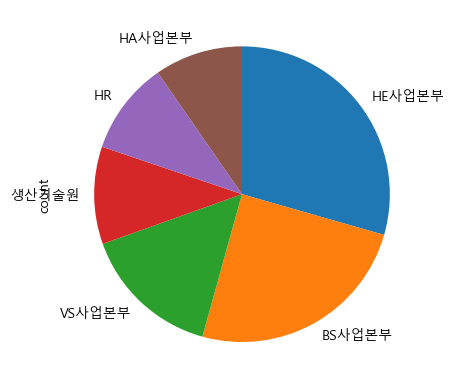

In [24]:
org_hr_merge['KOR_DIVISION'].value_counts().plot(kind='pie', startangle = 90, counterclock = False)


<Axes: xlabel='AGE', ylabel='SALARY'>

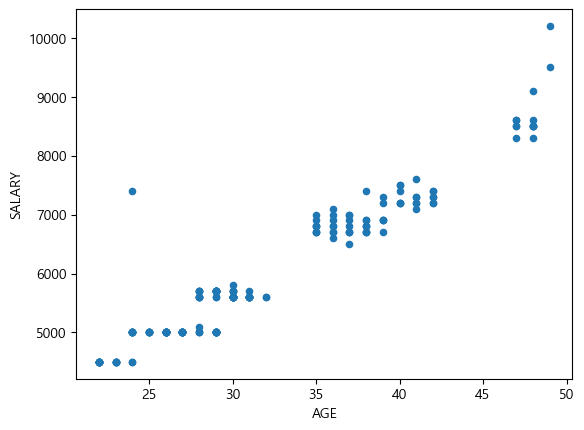

In [27]:
hr_info.plot(kind='scatter', x ='AGE', y='SALARY')

####

#### Seaborn 패키지를 이용한 차트

#### 1. 히스토그램


In [30]:
# 성별에 따른 연봉 히스토그램

import seaborn as sns

<Axes: xlabel='SALARY', ylabel='Count'>

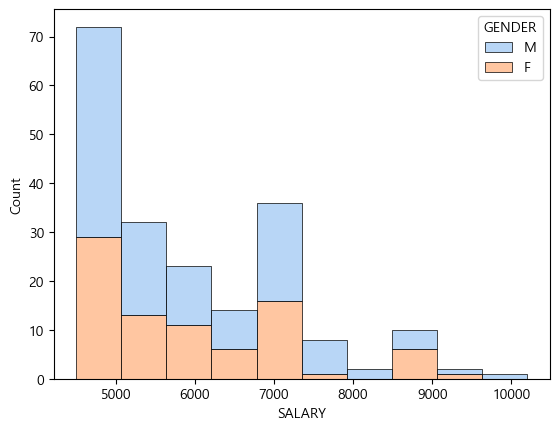

In [41]:
sns.histplot( # Seaborn의 히스토그램을 생성하는 함수
    hr_info, # 사용할 데이터
    x = 'SALARY',
    hue = 'GENDER', # 분류 기준
    multiple = 'stack',
    palette = 'pastel',
    # Set1, Set2 등
    linewidth = 0.5,
)

#### 2. 버블차트
나이와 근속연수에 따른 부서별 연봉

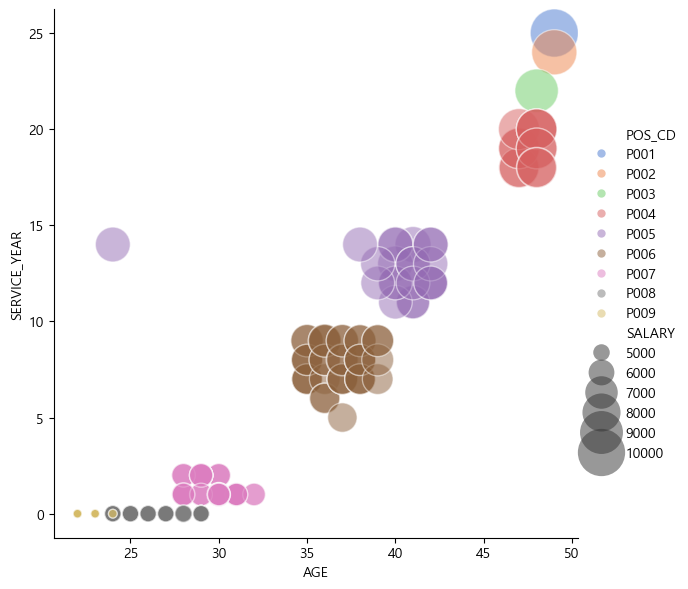

In [43]:
sns.relplot(data = hr_info,
            x = 'AGE',
            y = 'SERVICE_YEAR',
            hue = 'POS_CD',
            size = 'SALARY',
            sizes = (40, 1200),
            alpha = 0.5,
            palette = 'muted',
            height = 6)

#### 3. 히트맵


In [49]:
hr_corr = hr_info[['PERFORMANCE_SCORE','SALARY','AGE','SERVICE_YEAR','TRAINING_HOURS']].corr()
hr_corr

,PERFORMANCE_SCORE,SALARY,AGE,SERVICE_YEAR,TRAINING_HOURS
PERFORMANCE_SCORE,1.000000,0.609152,0.582203,0.492801,0.551200
SALARY,0.609152,1.000000,0.961699,0.970875,0.628931
AGE,0.582203,0.961699,1.000000,0.932563,0.575867
SERVICE_YEAR,0.492801,0.970875,0.932563,1.000000,0.559911
TRAINING_HOURS,0.551200,0.628931,0.575867,0.559911,1.000000


In [50]:
hr_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   EID                 200 non-null    object        
 1   ENAME               200 non-null    object        
 2   GENDER              200 non-null    object        
 3   ORG_CD              197 non-null    object        
 4   POS_CD              200 non-null    object        
 5   AGE                 200 non-null    int64         
 6   SERVICE_YEAR        200 non-null    int64         
 7   EDU_LEVEL           200 non-null    object        
 8   PERFORMANCE_SCORE   200 non-null    float64       
 9   SALARY              200 non-null    int64         
 10  LAST_PROMO_DT       182 non-null    object        
 11  TRAINING_HOURS      200 non-null    int64         
 12  SKILLS              200 non-null    object        
 13  ACTIVE_STATE        200 non-null    object        

<Axes: >

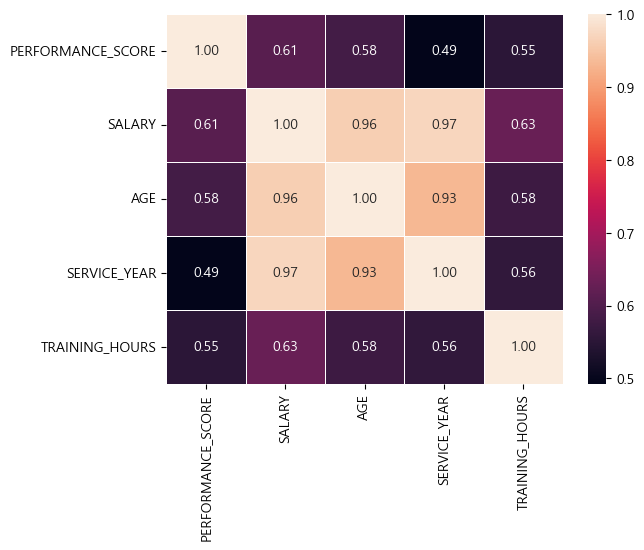

In [54]:
sns.heatmap(hr_corr, annot=True, fmt = '.2f', linewidths=0.5)